# Importing Libraries

In [1]:
import pandas as pd #basic data operations 
import numpy as np
import re #for using regex functions
import seaborn as sns
import matplotlib.pyplot as plt # for visualization of data
from matplotlib import style   # to set style for the plots
style.use('ggplot') # ggplot is used here 
from textblob import TextBlob  # to process textual data
from nltk.tokenize import word_tokenize  # to perform tokenization
from nltk.stem import PorterStemmer # to perform stemming 
from nltk.corpus import stopwords #to remove the stopwords
stop_words = set(stopwords.words('english')) #setting stopwords as english
from wordcloud import WordCloud #to plot the wordcloud
from sklearn.feature_extraction.text import CountVectorizer #to vectorize the text document
from sklearn.model_selection import train_test_split #to train the texting data
from sklearn.linear_model import LogisticRegression #to perform logistic regression on the data
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay  #different evaluation model for evaluation
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('TSA-Preprocessing-dropped-60k.csv')  #to load the data

In [3]:
df.head() 

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
1,world wrong side history year hopefully bigges...,-0.5,Negative
2,facts immutable senator even youre ethically s...,0.1,Positive
3,anyone useful adviceguidance whether covid vac...,0.4,Positive
4,bit sad claim fame success vaccination patriot...,-0.1,Negative


## Visualization of Data using CountPlot

<AxesSubplot:xlabel='sentiment', ylabel='count'>

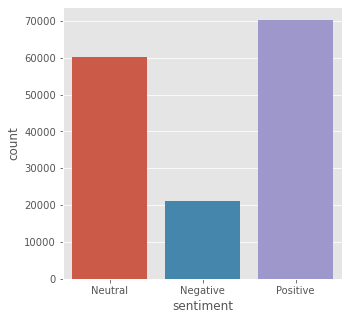

In [4]:
fig = plt.figure(figsize=(5,5))    #applying figure size

sns.countplot(x='sentiment', data = df)

## Visualization of Data using PieChart

Text(0.5, 1.0, 'Distribution of sentiments')

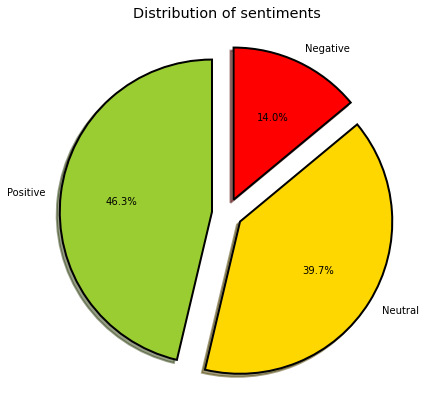

In [5]:
fig = plt.figure(figsize=(7,7)) 
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

## Top 5 Tweets for each type of sentiment  and its Visulization using Word Cloud

### Positive Tweets

In [6]:
pos_tweets = df[df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
84931,covaxin perfect example make india atmanirbhar...,1.0,Positive
149822,cpho_canada covaxin works best release please ...,1.0,Positive
126022,moderna best protect children vaccinate childr...,1.0,Positive
48490,pti_news team pti clarify use socialmedia best...,1.0,Positive
149829,cpho_canada breakfasttv talk best one covaxin ...,1.0,Positive


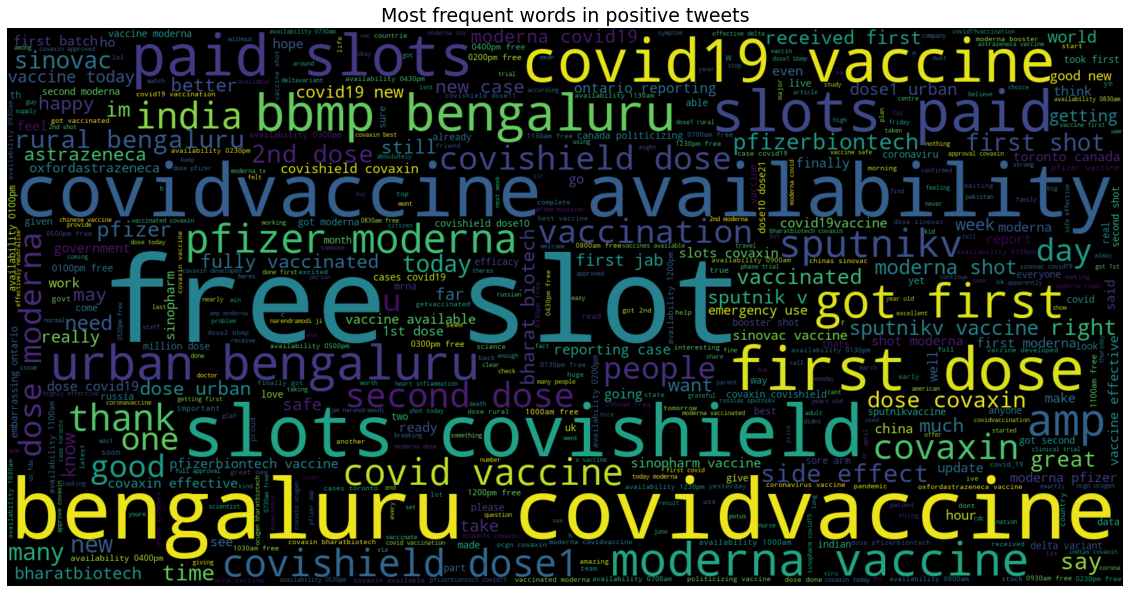

In [7]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

### Negative Tweets

In [8]:
neg_tweets = df[df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text,polarity,sentiment
44056,woke around 1 sweaty fever broken pretty much ...,-6.938894e-18,Negative
38274,grannygail31 congrats gg first dose moderna tu...,-9.251859e-18,Negative
88225,double dosed ass currently kicked tired bit wo...,-1.110223e-17,Negative
58956,zombie translating pziser blue zombie basic sl...,-1.110223e-17,Negative
55957,older vulnerable people mrdered thats bold sta...,-1.850372e-17,Negative


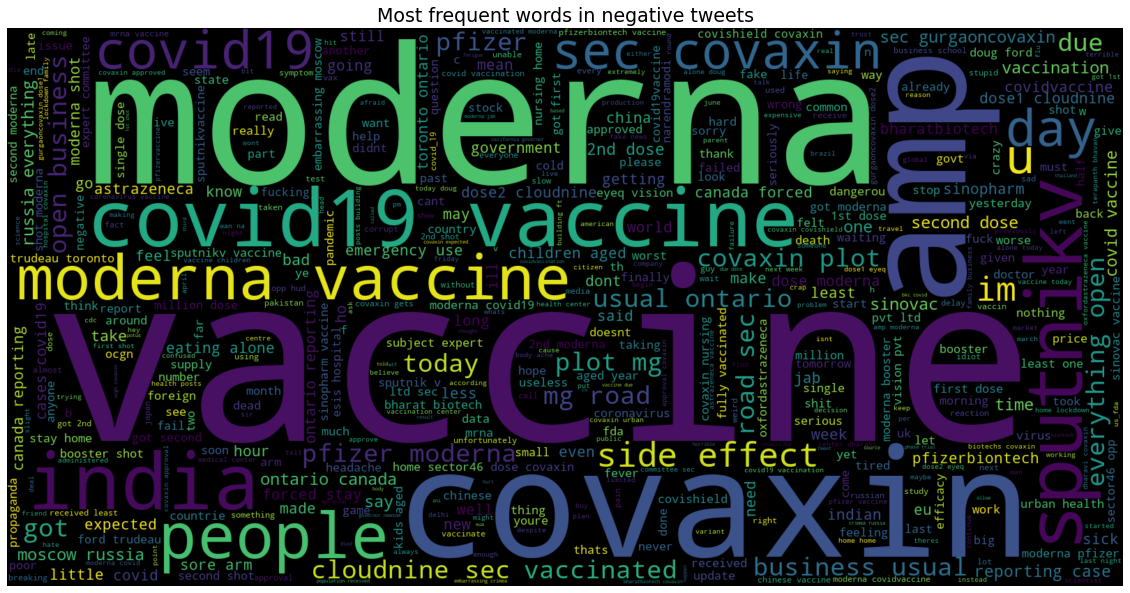

In [9]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

### Neutral Tweets

In [10]:
neutral_tweets = df[df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
101975,231228 122001 02082021 36 dose2 max hospital c...,0.0,Neutral
101961,000010 411048 07082021 15 dose2 pmc p apollo c...,0.0,Neutral
101962,000009 411048 07082021 13 dose1 pmc p apollo c...,0.0,Neutral
101963,000004 411014 07082021 233 dose1 pmc p apollo ...,0.0,Neutral


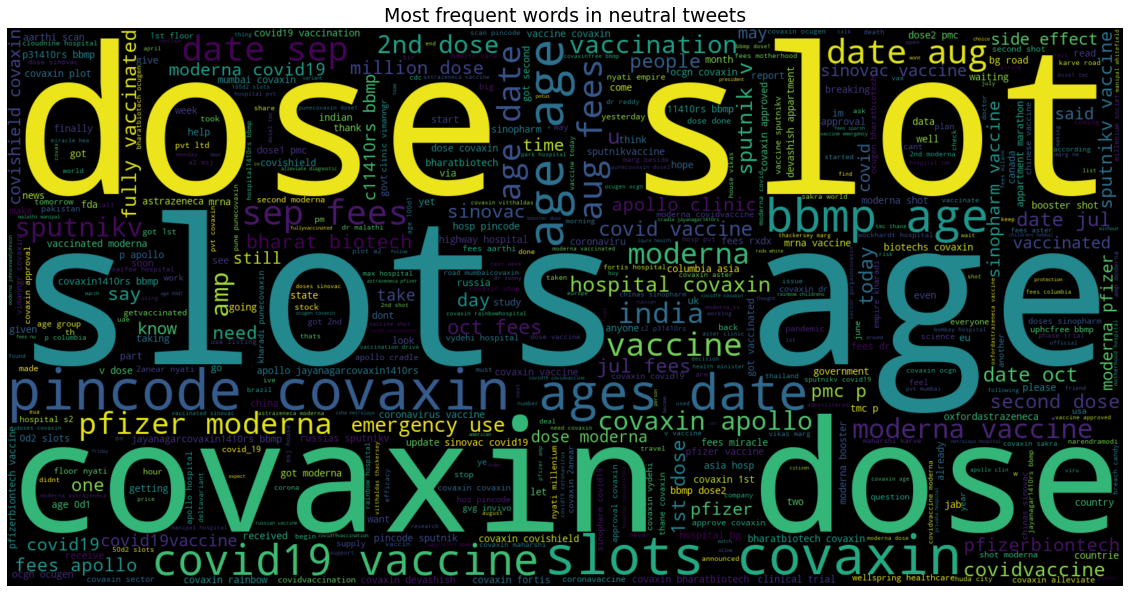

In [11]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

## Line chart of the number of tweets over time:

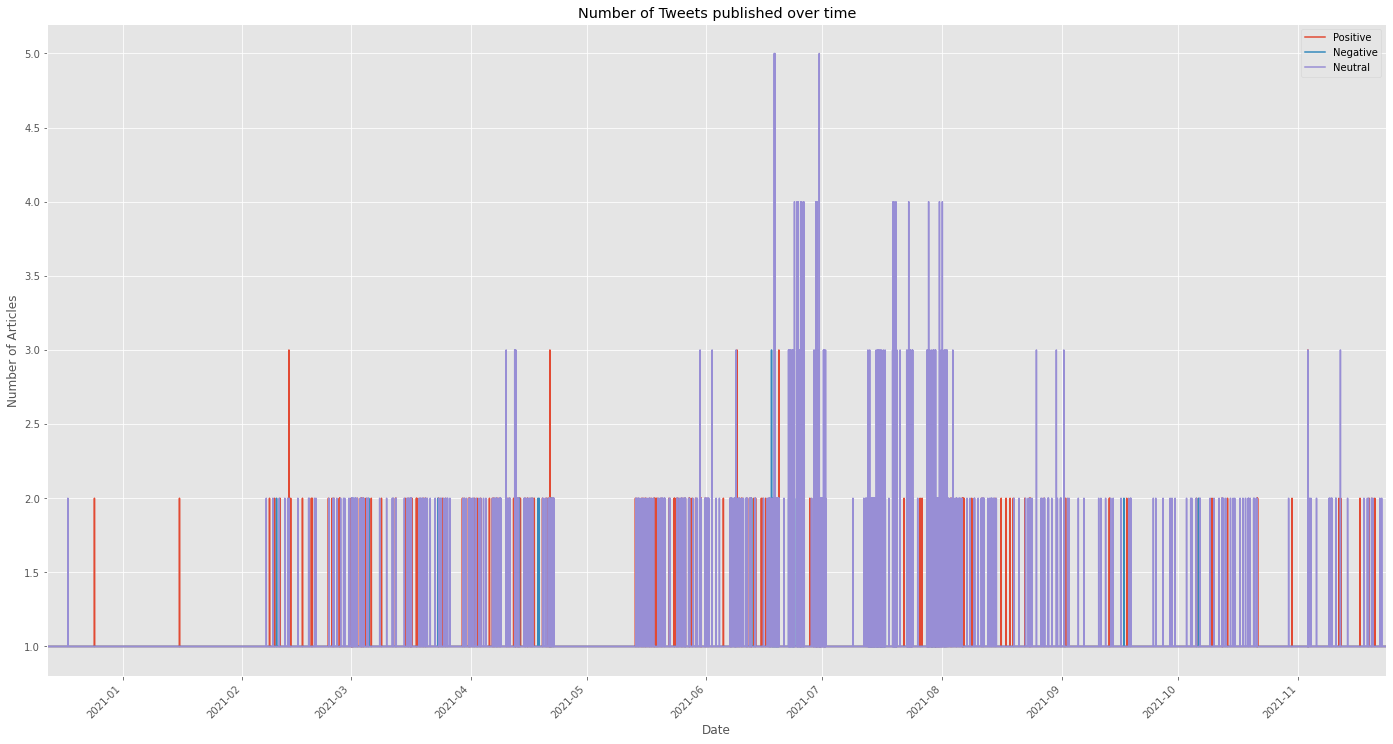

In [12]:
data = pd.read_csv("TSA-preprocessing.csv")
data1 = data.groupby('date').count()['text']
data1.index = pd.to_datetime(data1.index)


positive = data[data["sentiment"] == "Positive"]
negative = data[data["sentiment"] == "Negative"]
neutral = data[data["sentiment"] == "Neutral"]

# remove rows with invalid date strings
Positive1 = positive[pd.to_datetime(positive['date'], errors='coerce').notnull()]
Negative1 = negative[pd.to_datetime(negative['date'], errors='coerce').notnull()]
Neutral1 = neutral[pd.to_datetime(neutral['date'], errors='coerce').notnull()]

# convert date column to datetime format
Positive1['date'] = pd.to_datetime(Positive1['date'])
Negative1['date'] = pd.to_datetime(Negative1['date'])
Neutral1['date'] = pd.to_datetime(Neutral1['date'])

# group the news articles by date and count the number of articles
positive_count = Positive1.groupby('date').count()['text']
negative_count = Negative1.groupby('date').count()['text']
neutral_count = Neutral1.groupby('date').count()['text']

# set the figure size
plt.figure(figsize=(24, 12))

# plot the time series
plt.plot(positive_count.index, positive_count.values, label='Positive')
plt.plot(negative_count.index, negative_count.values, label='Negative')
plt.plot(neutral_count.index, neutral_count.values, label='Neutral')
plt.legend()
# set x-axis limits to date range
plt.xlim(data1.index.min(), data1.index.max())
plt.title('Number of Tweets published over time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')

# set the x-tick labels to the dates in the original format
plt.xticks(rotation=45, ha='right')
plt.show()